In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from glob import glob

from utils.datasets.foscal.patient import FOSCALPatient
from metrics import compute_segmentation_metrics

sns.set_theme()

# Load the data

In [35]:
patients = []
dset_dir = "/data/Datasets/stroke/ISBI_FOSCAL/"
patient_dirs = glob(os.path.join(dset_dir, "*"))
for patient_dir in patient_dirs:
    patient = FOSCALPatient(patient_dir)
    patients.append(patient)

# Visualize some cases

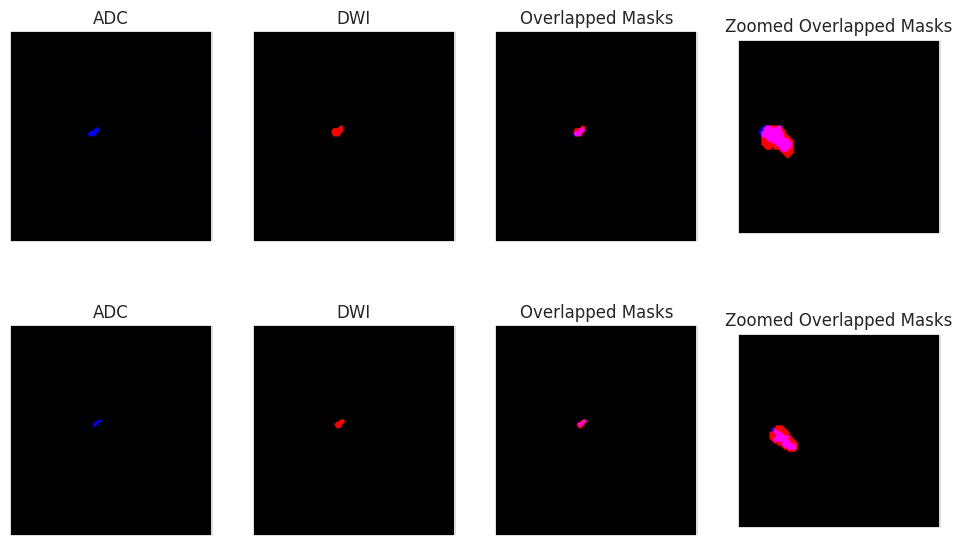

In [73]:
modalities = ["ADC", "DWI"]
normalization = "min_max"
data = patients[0].get_data(modalities=modalities, normalization=normalization)
masks = patients[0].get_mask(modalities=modalities)

suma=masks['ADC'].sum(axis=0)
plots = np.nonzero(suma.sum(axis=0))[0].tolist()

plt.figure(figsize=(12, 7))
N_COLS = 4

for idx, n_plot in enumerate(plots):
    dwi = masks['DWI'][:, :, n_plot]
    adc = masks['ADC'][:, :, n_plot]
    
    red_dwi = np.zeros(shape=(dwi.shape[0], dwi.shape[1], 3))
    blue_adc = np.zeros(shape=(adc.shape[0], adc.shape[1], 3))
    red_dwi[:, :, 0] = dwi[:, :]
    blue_adc[:, :, 2] = adc[:, :]
    
    plt.subplot(len(plots), N_COLS, (idx * N_COLS) + 1)
    plt.imshow(blue_adc)
    plt.xticks([])
    plt.yticks([])
    plt.title('ADC')
    
    plt.subplot(len(plots), N_COLS, (idx * N_COLS) + 2)
    plt.imshow(red_dwi)
    plt.xticks([])
    plt.yticks([])
    plt.title('DWI')
    
    plt.subplot(len(plots), N_COLS, (idx * N_COLS) + 3)
    plt.imshow(blue_adc + red_dwi)
    plt.xticks([])
    plt.yticks([])
    plt.title('Overlapped Masks')
    
    plt.subplot(len(plots), N_COLS, (idx * N_COLS) + 4)
    plt.imshow(blue_adc + red_dwi)
    plt.xlim([int(dwi.shape[0]/3), int(dwi.shape[0]/3) * 2])
    plt.ylim([int(dwi.shape[1]/3), int(dwi.shape[1]/3) * 2])
    plt.xticks([])
    plt.yticks([])
    plt.title('Zoomed Overlapped Masks')
    
plt.show()

## Show statistics

### 1. Metrics for each patient

In [19]:
metrics = []
for person in patients:
    masks = person.get_mask(modalities=modalities)
    metrics.append(compute_segmentation_metrics(masks["DWI"], masks["ADC"]))
    
df_metrics = pd.DataFrame(data = metrics)
df_metrics.index.names=['Patient']
df_metrics

,sens,spec,ppv,npv,dsc,avd,hd
Patient,,,,,,,
0,0.567010,0.999995,0.948276,0.999927,0.709684,0.503226,135.240526
1,0.513158,0.999998,0.928571,0.999977,0.661046,0.576271,136.784502
2,0.654221,0.999946,0.945455,0.999506,0.773327,0.364116,158.053788
3,0.094555,0.999941,0.806883,0.997628,0.169276,1.580425,70.028566
4,0.393443,0.999779,0.452830,0.999718,0.421057,0.140351,72.952039
5,0.139691,0.999934,0.833581,0.997962,0.239285,1.425890,155.003226
6,0.264912,0.999994,0.937888,0.999734,0.413141,1.119015,143.464281
7,0.476744,0.999977,0.677686,0.999947,0.559742,0.348123,6.000000
8,0.274436,0.999982,0.928753,0.999386,0.423683,1.087638,23.108440


### 2. Descriptive Statistics

In [28]:
df_metrics.describe()

,sens,spec,ppv,npv,dsc,avd,hd
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.411540,0.999888,0.843516,0.999215,0.529523,0.723795,86.094555
std,0.177403,0.000181,0.147308,0.000870,0.186047,0.436068,55.612801
min,0.094555,0.999444,0.452830,0.997628,0.169276,0.140351,3.162278
25%,0.301383,0.999929,0.813558,0.998420,0.421713,0.398894,44.371881
50%,0.399765,0.999962,0.900789,0.999612,0.538488,0.628561,86.839697
75%,0.507884,0.999993,0.935604,0.999925,0.660687,1.008685,136.398508
max,0.709570,1.000000,1.000000,0.999980,0.797243,1.580425,158.053788


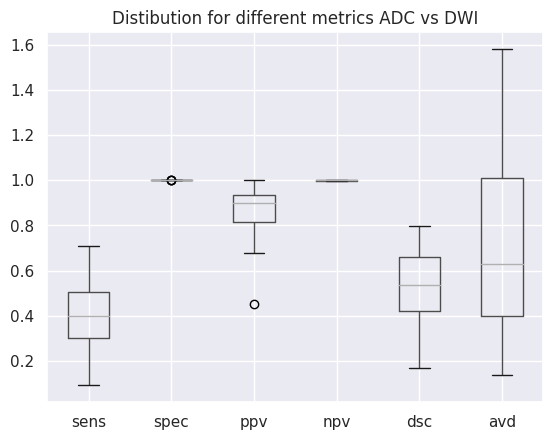

In [34]:
df_metrics[[x for x in df_metrics.columns if x not in ['hd']]].boxplot()
plt.title('Distibution for different metrics ADC vs DWI')
plt.show()

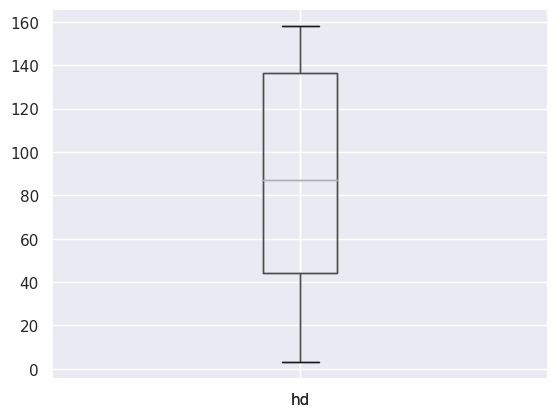

In [76]:
df_metrics[['hd']].boxplot()
plt.show()